<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 2: Discrete-Time Systems<br/>
    <small>Date: 01/25/2023 </small><br/>
    <small>Section: Thursday 11:30 am <s/small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Connor Davin CJD 3 Hrs | | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**: *One-sided, with cover sheet, answers are in the same order as questions in the lab*||||
|**Ability to process given signals (20 pts)**: *Import signal, plot signal, filter signal*||||
|**Understanding and ability to implement difference equations (60 pts)**: *Draw system diagram, calculate impulse response, find inverse system answer ’discuss/explain’ questions*||||
|**Ability to test for linearity and time-invariance of systems (20 pts)**: *Supporting plots with clear indication of the proof*||||

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

In [51]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 2</left></h3>

**1. Draw the block diagram of the discrete-time differentiator as in Figure 1.**

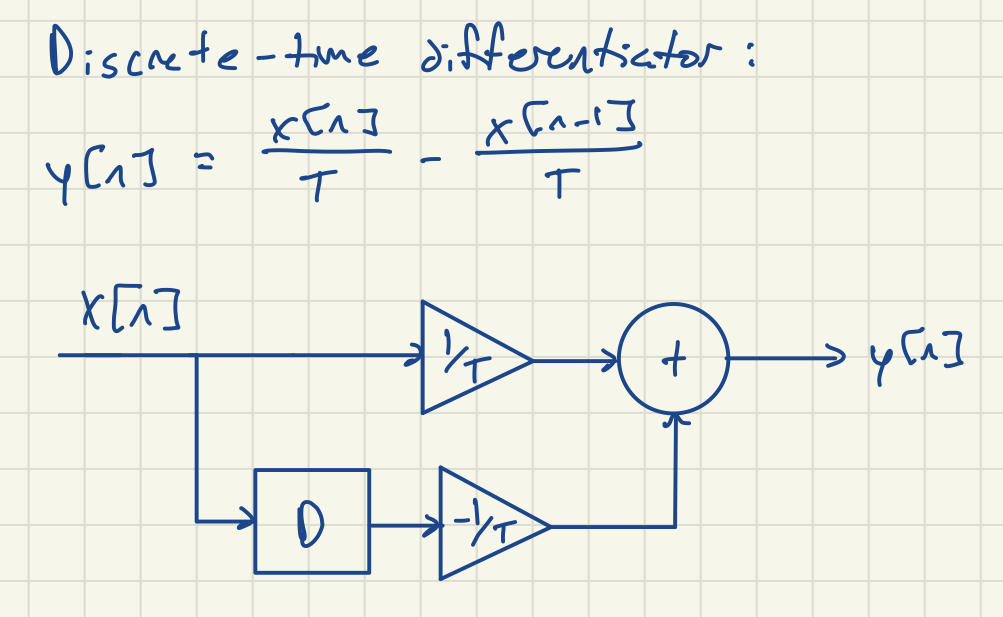

**2. Apply the discrete-time differentiator to the signal $u[n]-u[n-(N+1)]$, with $N=10$, for $-10\leq n\leq20$, and plot the output. (This assumes a time step of $T=1$)**

<ipython-input-52-08066cba4675>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, yn)


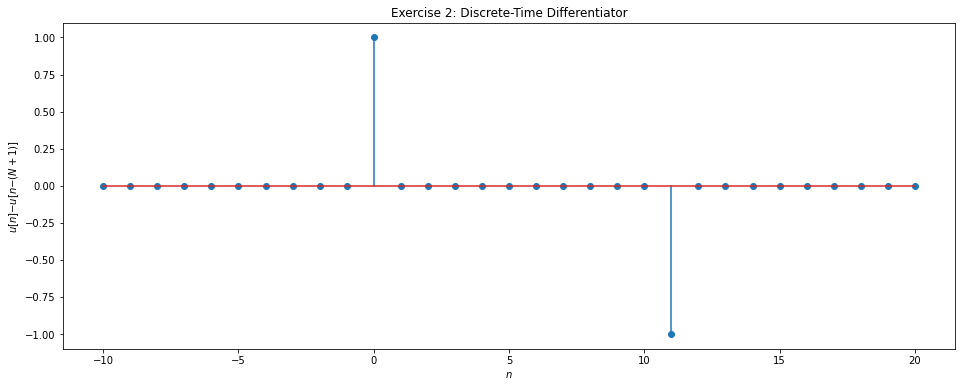

In [52]:
# write your code here
n = np.linspace(-10, 20, 31)
xn = (0 <= n).astype(float) - (11 <= n).astype(float)
xn_1 = (1 <= n).astype(float) - (12 <= n).astype(float)
yn = (xn - xn_1) / 1

plt.title(r"Exercise 2: Discrete-Time Differentiator")
plt.ylabel(r"$u[n]−u[n−(N+1)]$")
plt.xlabel(r"$n$")
plt.stem(n, yn)
plt.show()

**3. Draw the block diagram of the discrete-time integrator as in Figure 1.**

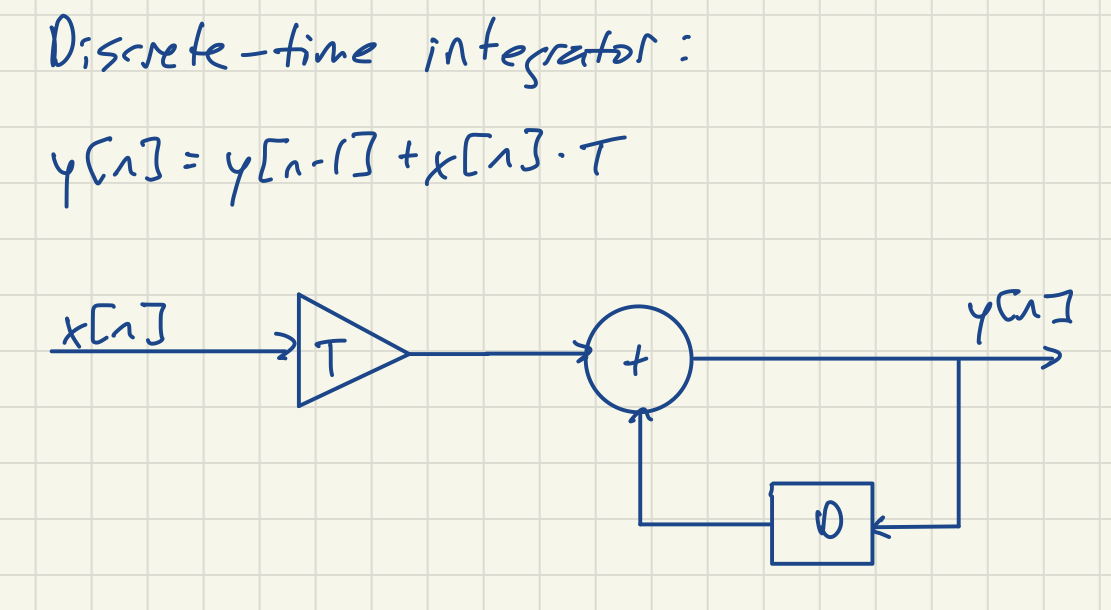

**4. Apply the discrete-time integrator to the signal $u[n]-u[n-(N+1)]$, with $N=10$, for $-10\leq n\leq20$, and plot the output. (This assumes a time step of $T=1$)**

<ipython-input-53-7f4cb2e2f13b>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, yn)


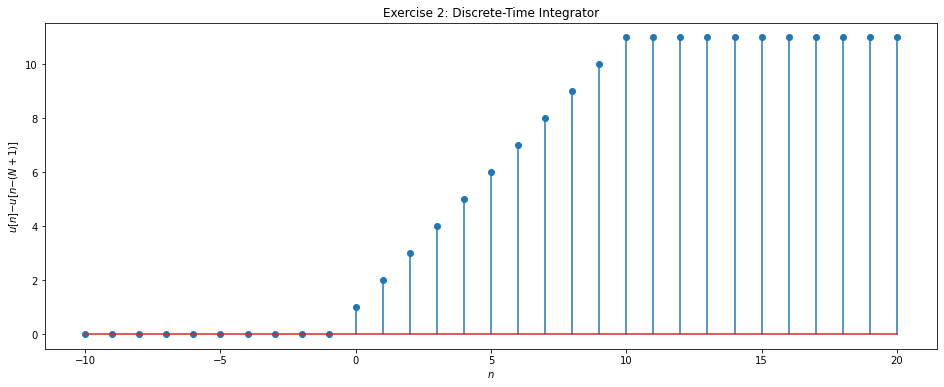

In [53]:
# write your code here
n = np.linspace(-10, 20, 31)
xn = (0 <= n).astype(float) - (11 <= n).astype(float)

yn = np.zeros(31)
yn[0] = 0 # set initial condition

for i in range(1, len(xn)):
  yn[i] = yn[i - 1] + xn[i] * 1

plt.title(r"Exercise 2: Discrete-Time Integrator")
plt.ylabel(r"$u[n]−u[n−(N+1)]$")
plt.xlabel(r"$n$")
plt.stem(n, yn)
plt.show()

**5. Use the discrete-time differentiator to numerically evaluate $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ for $t\in[0,10]$, try $T=0.1$.**

<ipython-input-54-25f4c6c4d068>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t, yn)


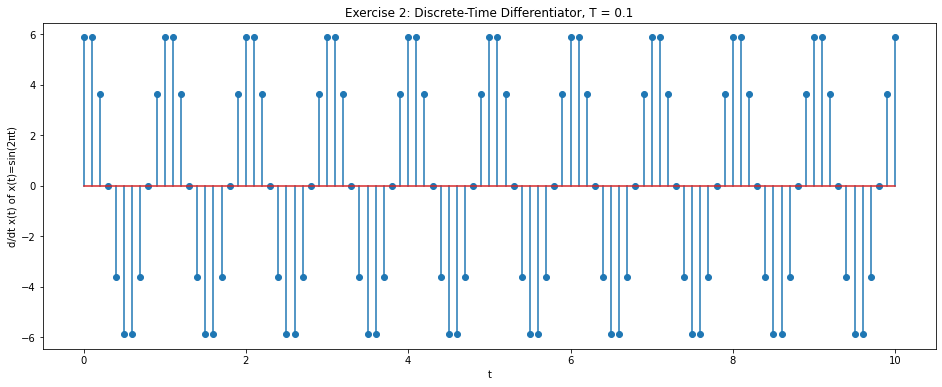

In [54]:
# write your code here
t = np.arange(0, 10+.1, .1) # aka nT
xt = np.sin(2*np.pi*t)
xt_1 = np.sin(2*np.pi*(t-.1))
yn = (xt - xt_1)/(.1)

plt.title(r"Exercise 2: Discrete-Time Differentiator, T = 0.1")
plt.ylabel(r"d/dt x(t) of x(t)=sin(2πt)")
plt.xlabel(r"t")
plt.stem(t, yn)
plt.show()

**6. Use the discrete-time differentiator to numerically evaluate $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ for $t\in[0,10]$, try $T=0.001$.**

<ipython-input-55-921c3c27e8c6>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t, yn)


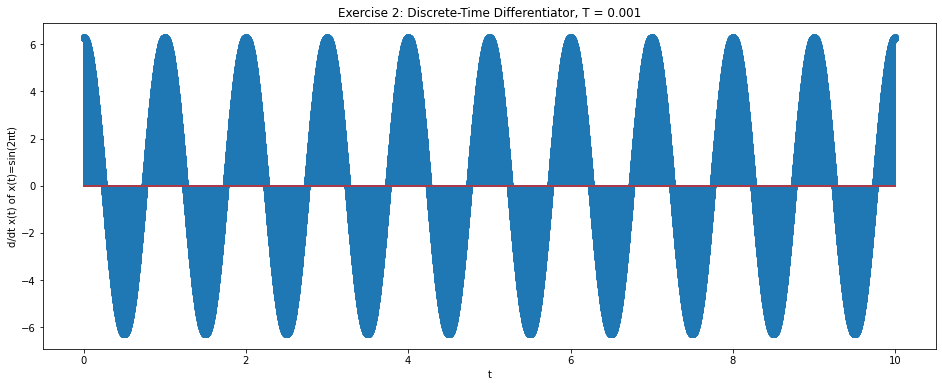

In [55]:
# write your code here
t = np.arange(0, 10+.001, .001)
xt = np.sin(2*np.pi*t)
xt_1 = np.sin(2*np.pi*(t-.001))
yn = (xt - xt_1)/(.001)

plt.title(r"Exercise 2: Discrete-Time Differentiator, T = 0.001")
plt.ylabel(r"d/dt x(t) of x(t)=sin(2πt)")
plt.xlabel(r"t")
plt.stem(t, yn)
plt.show()

**7. Compare the results in Q5 and Q6.**

Q5 and Q6 graphs are the result of the discrete time differentiator of x(t) = sin(2*pi*t), in discrete time x(t) -> x[n] = sin(2*pi*T*n). Q5 is sampled 10 times per period while Q6 is sampled 1000 times per period. Q6 clearly represents the cos(theta) function better due to how much more sampling was done.

<h3 style="color:red;"><left>Exercise 3</left></h3>

**1. For each of these five systems, do the following:**

* $S_1$
* $S_2$
* $S_1(S_2)$ (i.e., the series connection with $S_1$ following $S_2$)
* $S_2(S_1)$ (i.e., the series connection with $S_2$ following $S_1$)
* $S_1+S_2$

**i. Draw the system diagram (use only delays, multiplications, and additions as in Figure 1)**

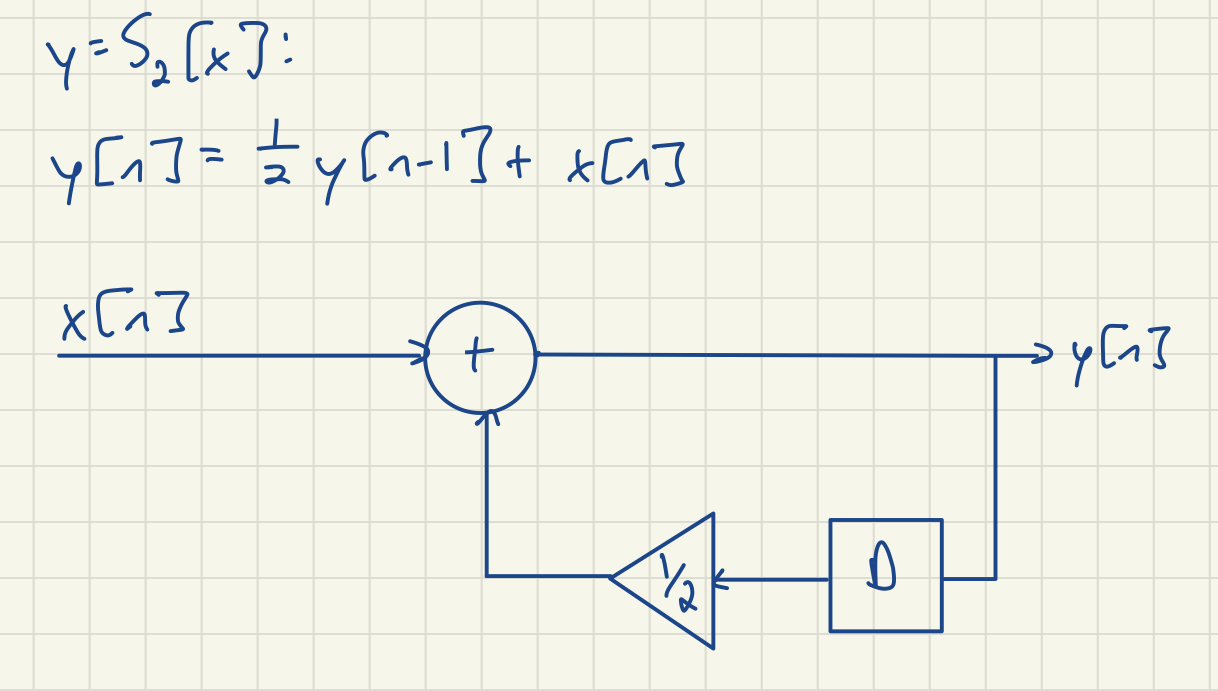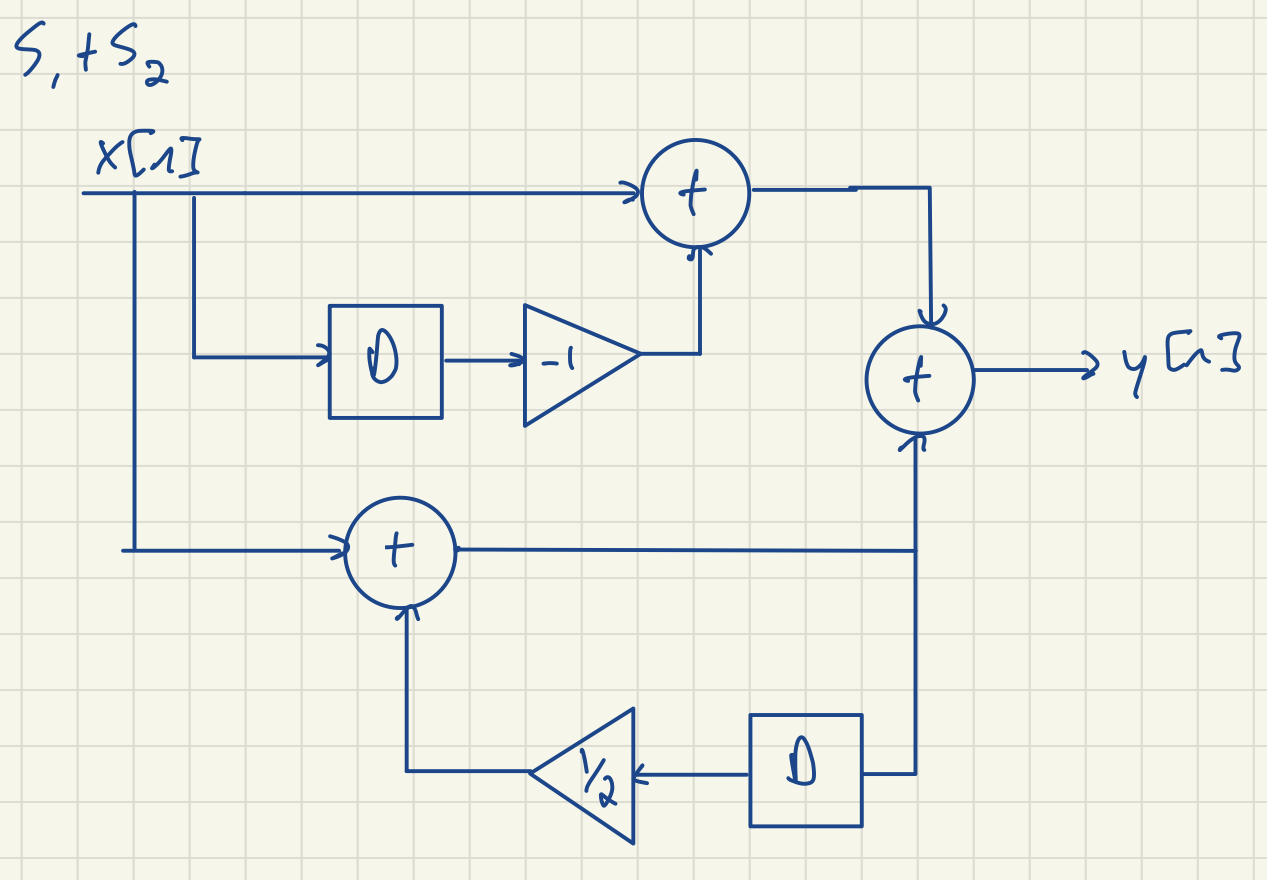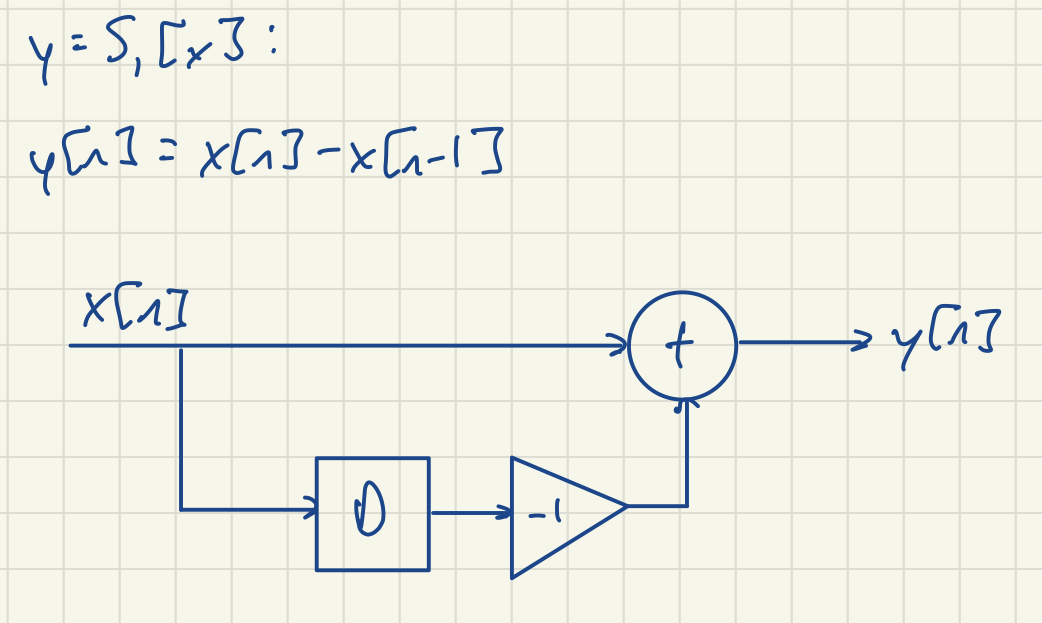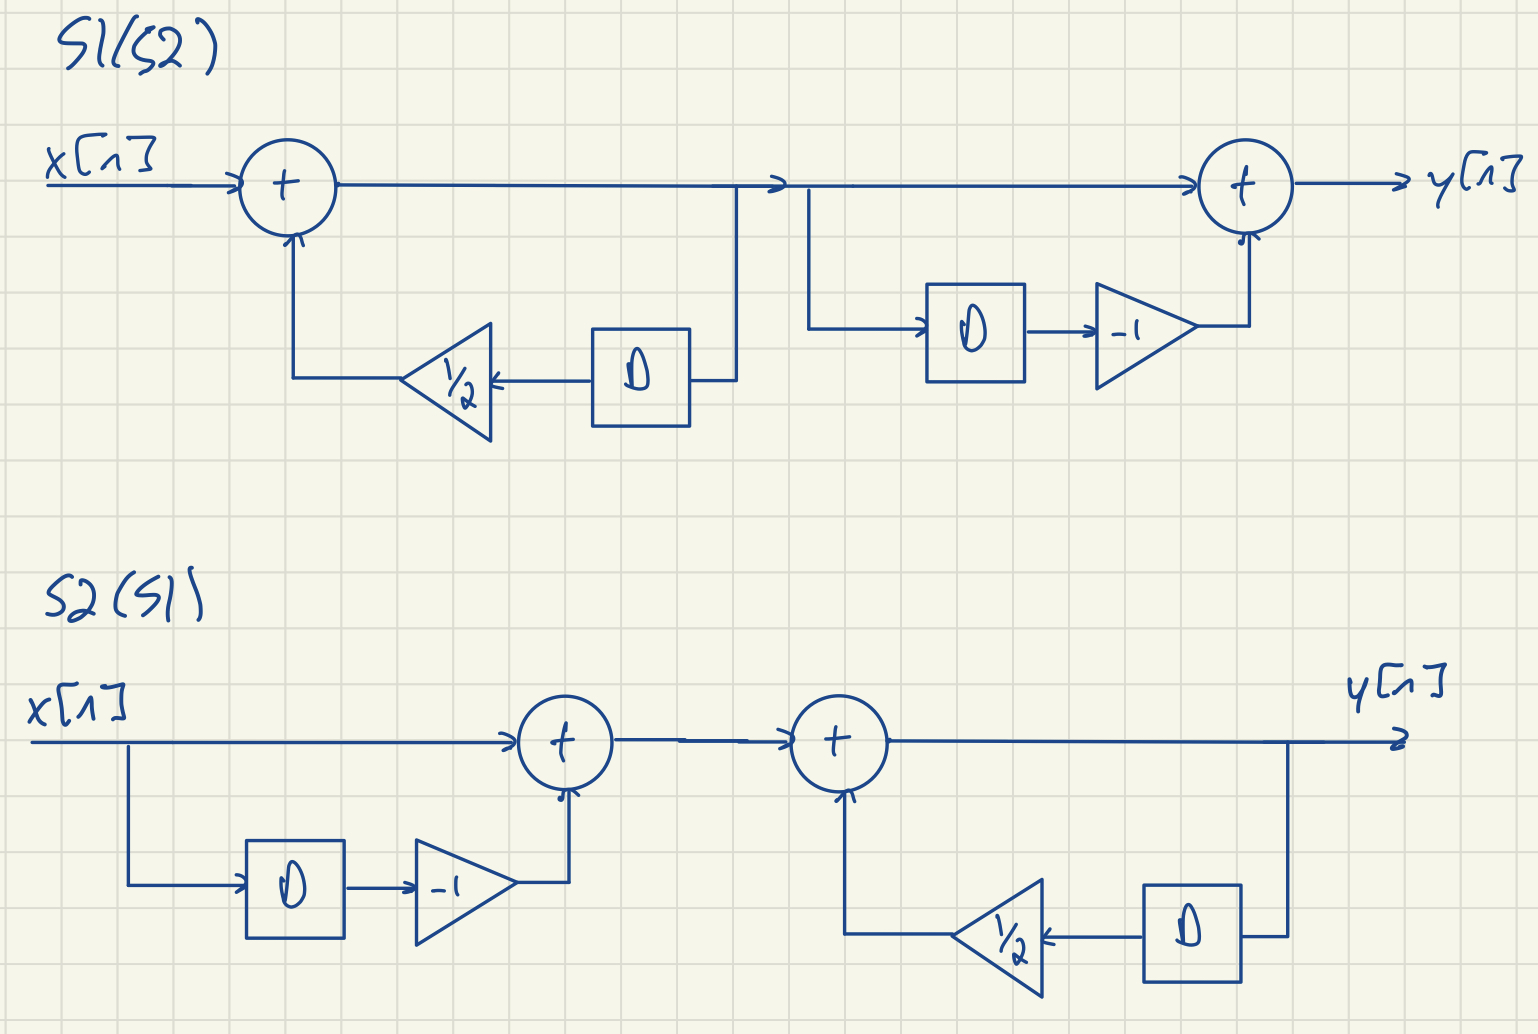

**ii. Write code to implement each of these two filters ($S_1, S_2$) in the following functions using the following syntax**
```python
def S1(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

and 
```python
def S2(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

In [56]:
# write your code here
def S1(x):
  y = np.zeros(len(x)) # len(x) is 21
  y[0] = 0 # initial condition 

  for i in range(1, len(x)): # 1...20
    y[i] = x[i] - x[i - 1]

  return y

def S2(x):
  y = np.zeros(len(x))
  y[0] = 0

  for i in range(1, len(x)): 
    y[i] = (1/2) * y[i - 1] + x[i]

  return y


**iii. Write code to calculate the impulse response of each of the five systems, and plot the impulse response of each of these five systems:**

<ipython-input-57-d62355d86c2a>:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S1(delta))


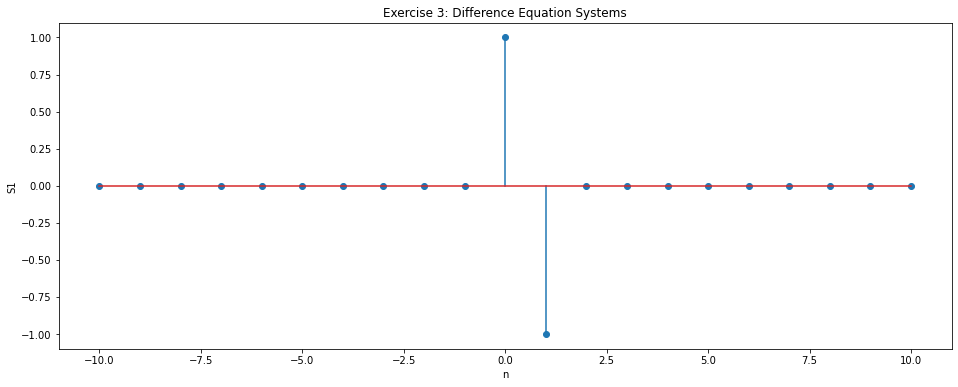

In [57]:
# write your code here
n = np.linspace(-10, 10, 21)
delta = (n == 0).astype(float)


plt.title(r"Exercise 3: Difference Equation Systems")
plt.ylabel(r"S1")
plt.xlabel(r"n")
plt.stem(n, S1(delta))
plt.show()


<ipython-input-58-75642369fa25>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S2(delta))


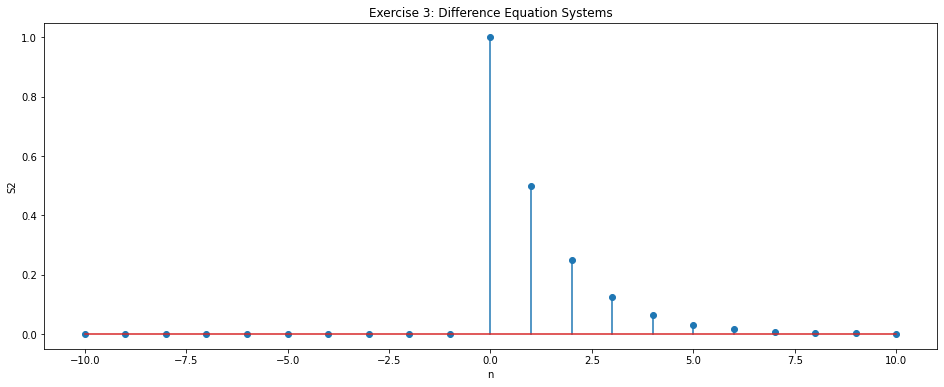

In [58]:
plt.title(r"Exercise 3: Difference Equation Systems")
plt.ylabel(r"S2")
plt.xlabel(r"n")
plt.stem(n, S2(delta))
plt.show()

<ipython-input-59-82bcd8ceada5>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S1(S2(delta)))


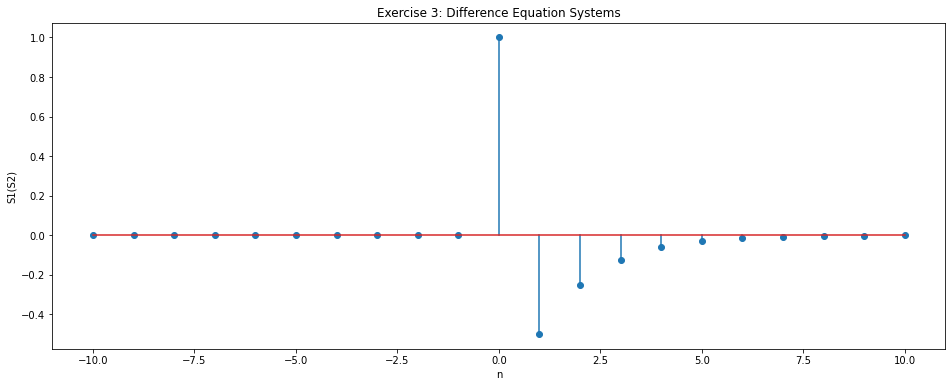

In [59]:
plt.title(r"Exercise 3: Difference Equation Systems")
plt.ylabel(r"S1(S2)")
plt.xlabel(r"n")
plt.stem(n, S1(S2(delta)))
plt.show()

<ipython-input-60-fba1f3e44345>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S2(S1(delta)))


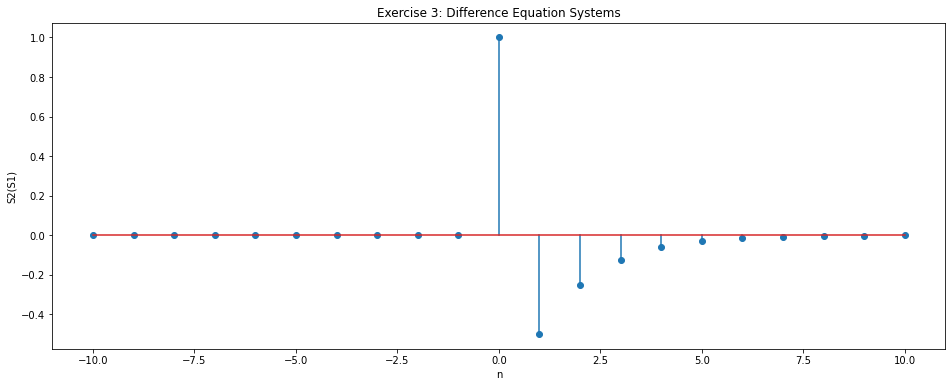

In [60]:
plt.title(r"Exercise 3: Difference Equation Systems")
plt.ylabel(r"S2(S1)")
plt.xlabel(r"n")
plt.stem(n, S2(S1(delta)))
plt.show()

<ipython-input-61-5beeefbe45fc>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S1(delta) + S2(delta))


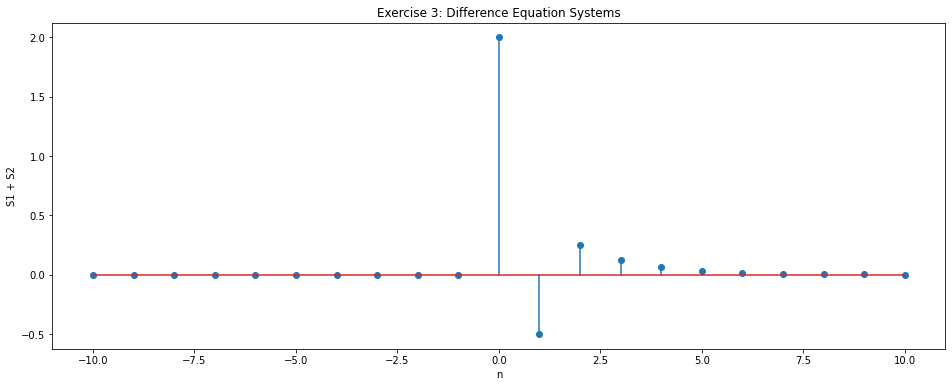

In [61]:
plt.title(r"Exercise 3: Difference Equation Systems")
plt.ylabel(r"S1 + S2")
plt.xlabel(r"n")
plt.stem(n, S1(delta) + S2(delta))
plt.show()

**2. Use the command ```audio, fs = sf.read("music.au")``` to load the file ```music.au``` into Python. The first variable ```audio``` is the signal, and the second variable ```fs``` is the sampling rate.**

In [62]:
# write your code here
audio, fs = sf.read("music.au")


**3. Play the audio file using the command `ipd.Audio(audio, rate=fs)`.**

In [63]:
# write your code here
ipd.Audio(audio, rate=fs)


**4. Next, filter the audio signal with each of the two systems $S_1$ and $S_2$ and listen to each of their outputs.**

In [64]:
# write your code here
audio_s1 = S1(audio)
ipd.Audio(audio_s1, rate=fs)

In [65]:
audio_s2 = S2(audio)
ipd.Audio(audio_s2, rate=fs)

**5. How do the filters change the sound of the audio signals? Explain your observations.**

Filter S1 makes the audio sound flat. It seems like it does not mask or exaggerate any frequencies like the original audio.

Filter S2 makes the audio sound muffled. It seems like the audio is "deeper" and farther away.

<h3 style="color:red;"><left>Exercise 4</left></h3>

**1. Consider the system $y=S_2[x]$ from Section 3. Find a difference equation for a new system $y=S_3[x]$ such that $\delta=S_3[S_2[\delta]]$ where $\delta$ denotes the discrete-time impulse function $\delta(n)$. Since both systems $S_2$ and $S_3$ are LTI, the time-invariance and superposition properties can be used to obtain $x=S_3[S_2[x]]$ for *any* discrete-time signal $x$. We say that the systems $S_3$ and $S_2$ are inverse filters because they cancel out the effects of each other.**

**Hint:** The system $y=S_3[x]$ can be described by the difference equation

\begin{equation}
    y[n]=ax[n]+bx[n-1]
\end{equation}

where $a$ and $b$ are constants.

write your answer here

**2. Complete the Python function using the following syntax.**
```python
def S3(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

In [66]:
# write your code here
def S3(x):
  y = np.zeros(len(x)) # len(x) is 21
  y[0] = 0 # initial condition 

  for i in range(1, len(x)): # 1...20
    y[i] = x[i] - (0.5 * x[i - 1])

  return y


**3. Write code to plot the impulse response of both $S_3$ and $S_3[S_2[\delta]]$ below.**

<ipython-input-67-8be85e2857cb>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S3(delta))


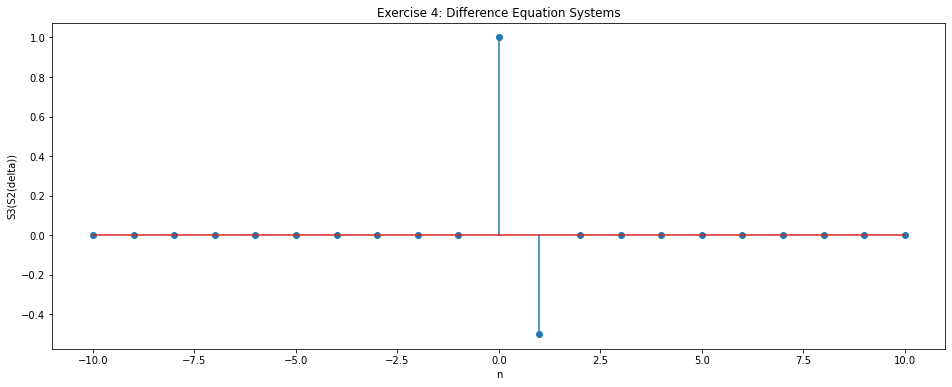

<ipython-input-67-8be85e2857cb>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S3(S2(delta)))


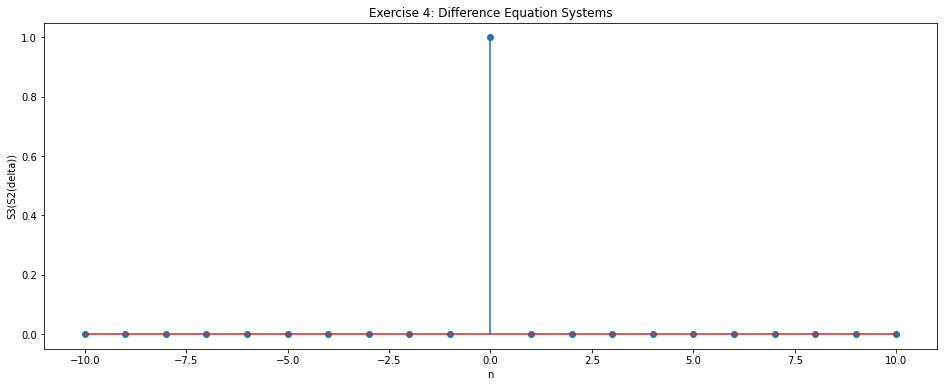

In [67]:
# write your code here
n = np.linspace(-10, 10, 21)
delta = (n == 0).astype(float)

plt.title(r"Exercise 4: Difference Equation Systems")
plt.ylabel(r"S3(S2(delta))")
plt.xlabel(r"n")
plt.stem(n, S3(delta))
plt.show()

plt.title(r"Exercise 4: Difference Equation Systems")
plt.ylabel(r"S3(S2(delta))")
plt.xlabel(r"n")
plt.stem(n, S3(S2(delta)))
plt.show()


<h3 style="color:red;"><left>Exercise 5</left></h3>

Often it is necessary to determine if a system is linear and/or time-invariant. If the inner workings of a system are not known, this task is impossible because the linearity and time-invariance properties must hold true for all possible input signals. However, it is possible to show that a system is non-linear or time-varying because only a single instance must be found where the properties are violated.

The code in the cell below is the synatx for the three imported black boxes, ```bbox1```, ```bbox2``` and ```bbox3```. All of them have the same syntax
```python
def bboxN(x):
    return y
```
where ```x``` and ```y``` are the input and the output signals, and ```N=1,2,3```. **Exactly one of these systems is non-linear, and exactly one of them is time-varying.** Your task is to find the non-linear system and the time-varying system.

**Hints:** 
* You should try a variety of input signals until you find a counter-example.
* When testing for time-invariance, you need to look at the responses to a signal and to its delayed version. Since all your signals in Python have a finite duration, you should be very careful about shifting signals. In particular, if you want to shift a signal $x$ by $M$ samples to the left, $x$ should start with at least $M$ zeros. If you want to shift $x$ by $M$ samples to the right, $x$ should end with at least $M$ zeros.
* When testing for linearity, you may find that simple inputs such as the unit impulse do not accomplish the task. In this case, you should try something more complicated like a sinusoid or a random signal generated with the ```x = np.random.rand(N)``` command, where ```N``` here is the length of the signal.

**1. Import the three bbboxes from the file ```bboxes.py```.**

In [68]:
# write your code here
from bboxes import bbox1, bbox2, bbox3


**2. Write code to plot input/output signal pairs that support your conclusions. Create multiple code cells if necessary.**

<ipython-input-69-b144ab76dc15>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s1)


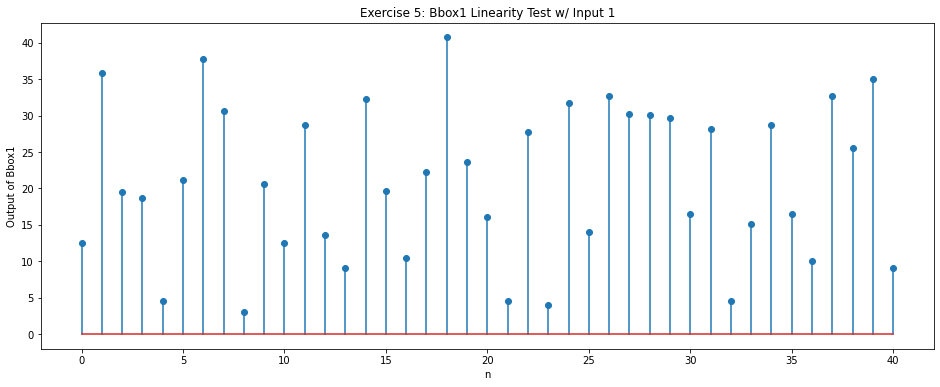

<ipython-input-69-b144ab76dc15>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s2)


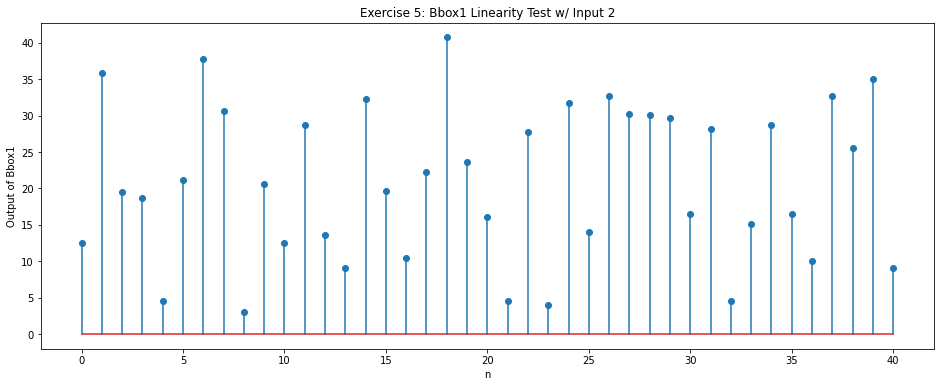

In [69]:
#linearity for bbox 1
a = .7
b = 2.5
f1 = np.random.randint(10, size = 41)
f2 = np.random.randint(10, size = 41)

s1 = a * bbox1(f1) + b * bbox1(f2)
s2 = bbox1(a * f1 + b * f2)

plt.title(r"Exercise 5: Bbox1 Linearity Test w/ Input 1")
plt.ylabel(r"Output of Bbox1")
plt.xlabel(r"n")
plt.stem(s1)
plt.show()

plt.title(r"Exercise 5: Bbox1 Linearity Test w/ Input 2")
plt.ylabel(r"Output of Bbox1")
plt.xlabel(r"n")
plt.stem(s2)
plt.show()


<ipython-input-70-3f2df826e07f>:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s1)


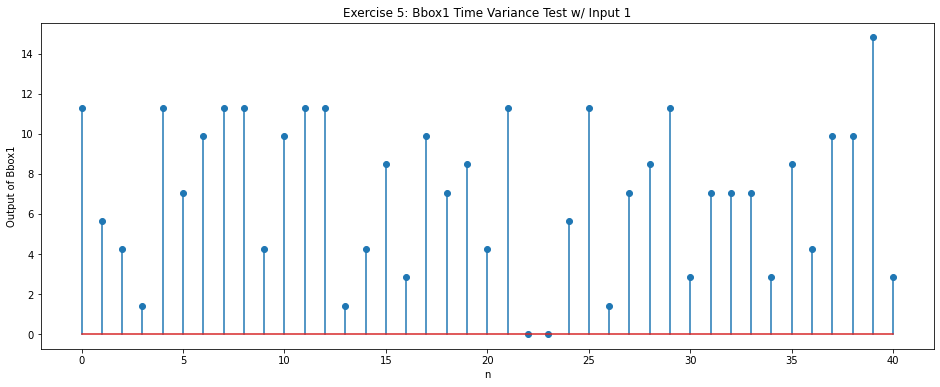

<ipython-input-70-3f2df826e07f>:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s2)


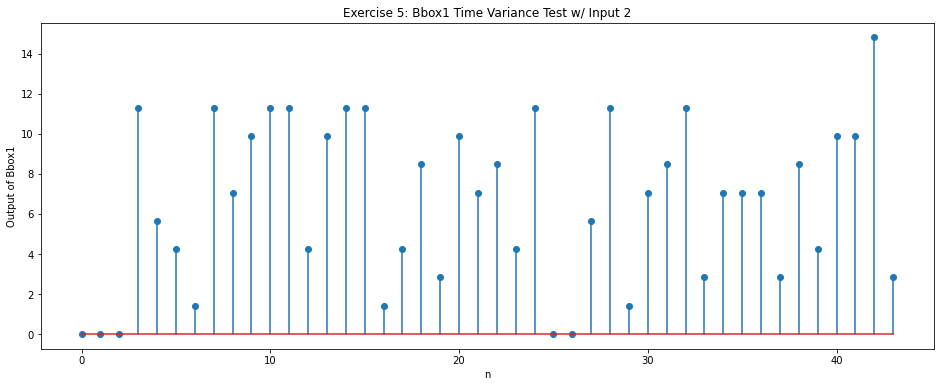

In [70]:
#time variance for bbox 1

f1 = np.random.randint(10, size = 41)
f2 = np.zeros(41+3)

for i in range(3, 41+3):
  f2[i] = f1[i-3]

s1 = bbox1(f1)
s2 = bbox1(f2)

plt.title(r"Exercise 5: Bbox1 Time Variance Test w/ Input 1")
plt.ylabel(r"Output of Bbox1")
plt.xlabel(r"n")
plt.stem(s1)
plt.show()

plt.title(r"Exercise 5: Bbox1 Time Variance Test w/ Input 2")
plt.ylabel(r"Output of Bbox1")
plt.xlabel(r"n")
plt.stem(s2)
plt.show()

<ipython-input-71-67e08ebeb911>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s1)


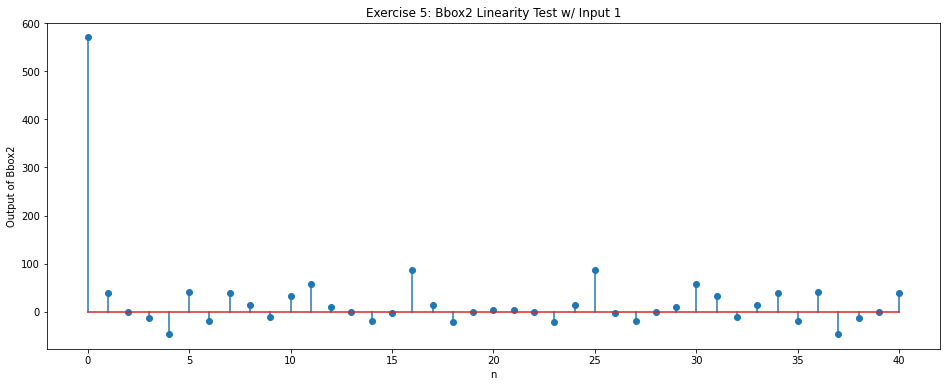

<ipython-input-71-67e08ebeb911>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s2)


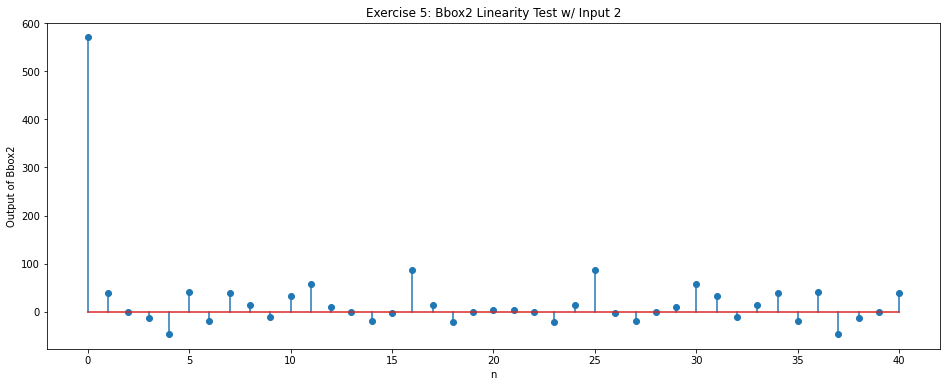

In [71]:
#linearity for bbox 2
a = .7
b = 2.5
f1 = np.random.randint(10, size = 41)
f2 = np.random.randint(10, size = 41)

s1 = a * bbox2(f1) + b * bbox2(f2)
s2 = bbox2(a * f1 + b * f2)

plt.title(r"Exercise 5: Bbox2 Linearity Test w/ Input 1")
plt.ylabel(r"Output of Bbox2")
plt.xlabel(r"n")
plt.stem(s1)
plt.show()

plt.title(r"Exercise 5: Bbox2 Linearity Test w/ Input 2")
plt.ylabel(r"Output of Bbox2")
plt.xlabel(r"n")
plt.stem(s2)
plt.show()

<ipython-input-72-0b0486b5b059>:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s1)


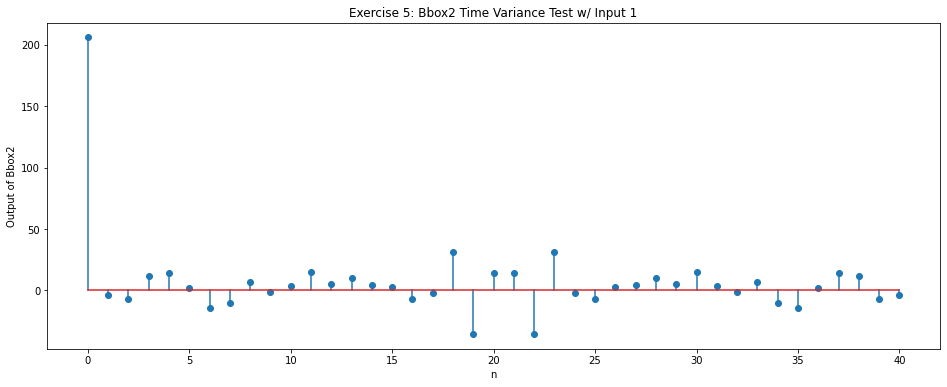

<ipython-input-72-0b0486b5b059>:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s2)


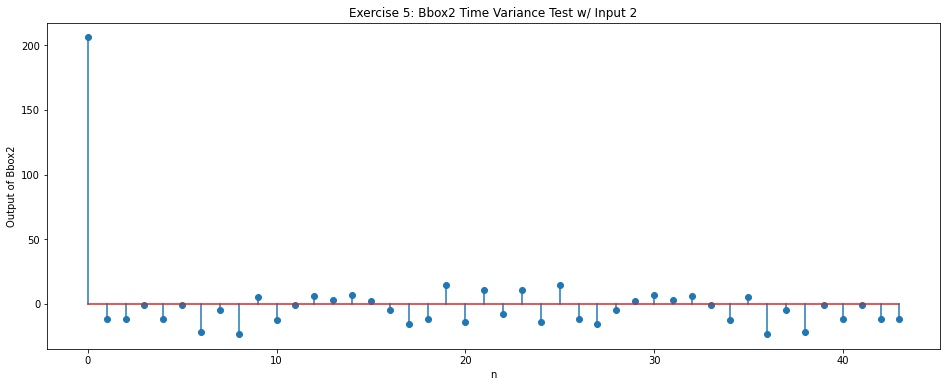

In [72]:
#time variance for bbox 2 (time varying)

f1 = np.random.randint(10, size = 41)
f2 = np.zeros(41+3)

for i in range(3, 41+3):
  f2[i] = f1[i-3]

s1 = bbox2(f1)
s2 = bbox2(f2)

plt.title(r"Exercise 5: Bbox2 Time Variance Test w/ Input 1")
plt.ylabel(r"Output of Bbox2")
plt.xlabel(r"n")
plt.stem(s1)
plt.show()

plt.title(r"Exercise 5: Bbox2 Time Variance Test w/ Input 2")
plt.ylabel(r"Output of Bbox2")
plt.xlabel(r"n")
plt.stem(s2)
plt.show()

<ipython-input-73-6efd0bcf6014>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s1)


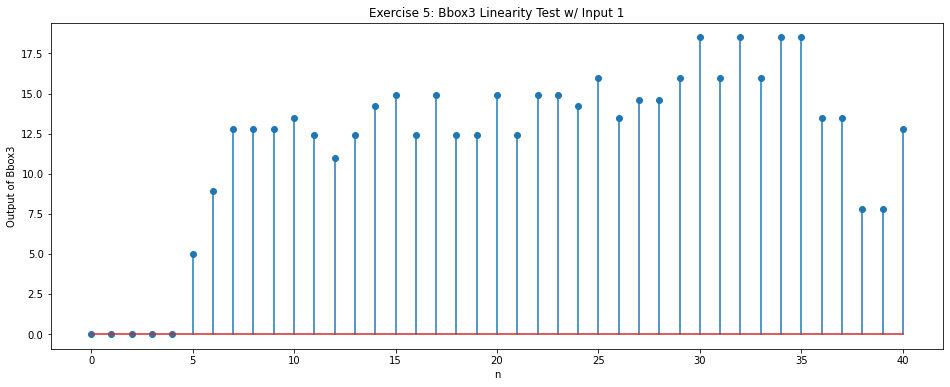

<ipython-input-73-6efd0bcf6014>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s2)


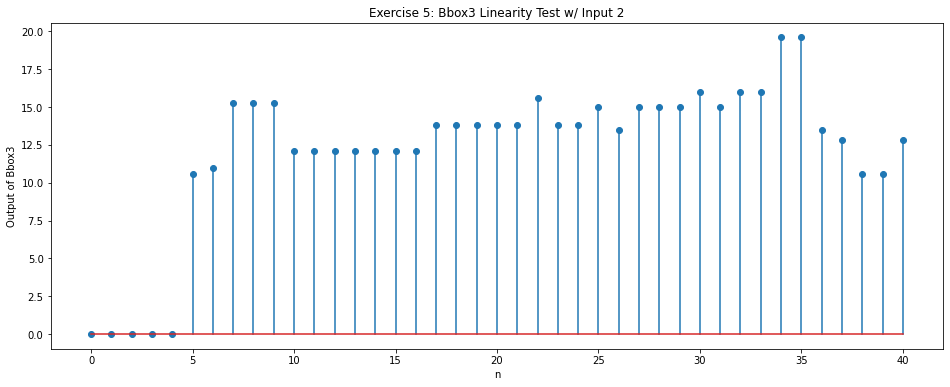

In [73]:
#linearity for bbox 3
a = .7
b = 2.5
f1 = np.random.randint(10, size = 41)
f2 = np.random.randint(10, size = 41)

s1 = a * bbox3(f1) + b * bbox3(f2)
s2 = bbox3(a * f1 + b * f2)

plt.title(r"Exercise 5: Bbox3 Linearity Test w/ Input 1")
plt.ylabel(r"Output of Bbox3")
plt.xlabel(r"n")
plt.stem(s1)
plt.show()

plt.title(r"Exercise 5: Bbox3 Linearity Test w/ Input 2")
plt.ylabel(r"Output of Bbox3")
plt.xlabel(r"n")
plt.stem(s2)
plt.show()

<ipython-input-74-ee7473545485>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s1)


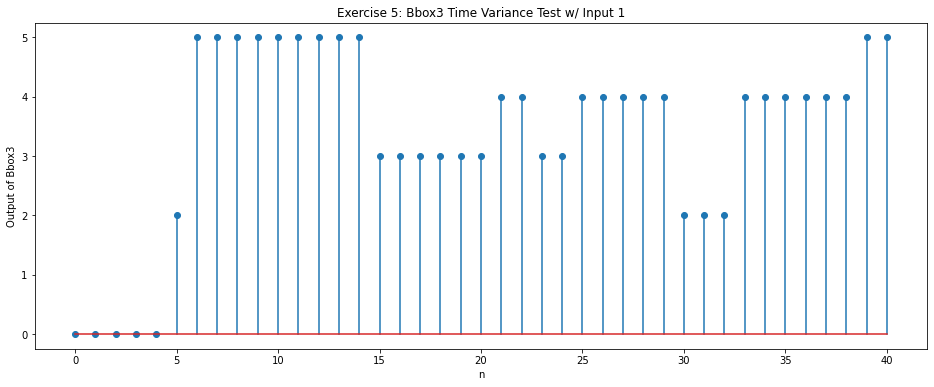

<ipython-input-74-ee7473545485>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s2)


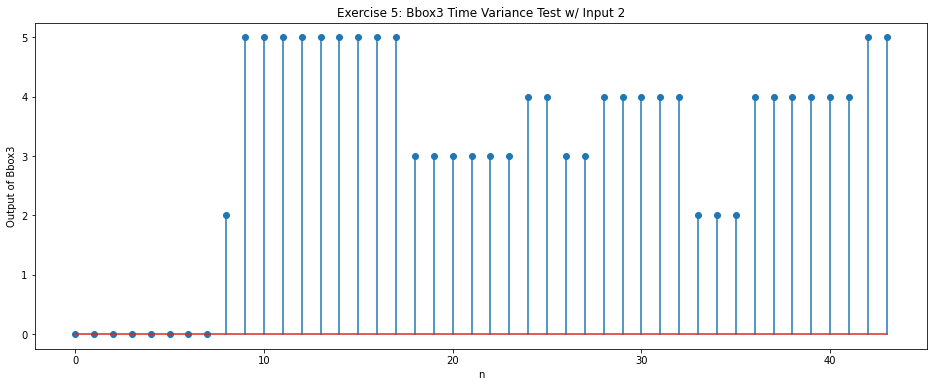

In [74]:
f1 = np.random.randint(10, size = 41)
f2 = np.zeros(41+3)

for i in range(3, 41+3):
  f2[i] = f1[i-3]

s1 = bbox3(f1)
s2 = bbox3(f2)

plt.title(r"Exercise 5: Bbox3 Time Variance Test w/ Input 1")
plt.ylabel(r"Output of Bbox3")
plt.xlabel(r"n")
plt.stem(s1)
plt.show()

plt.title(r"Exercise 5: Bbox3 Time Variance Test w/ Input 2")
plt.ylabel(r"Output of Bbox3")
plt.xlabel(r"n")
plt.stem(s2)
plt.show()

**2. State which system is non-linear and which system is time-varying.**


Bbox2 is a time varying system and Bbox3 is not a linear system.

**3. Explain how the plots support your conclusion.**

Bbox2 is a time varying system because when you compare the graphs of sample input 1 and sample input 2, it is clear that they are not a time shifted version of each other.

Bbox3 is not a linear system because when you compare the graphs of sample input 1 and sample input 2, it is clear that the graphs are not equal to each other at the same value. For example, at n = 15, sample input 1 has a value less than 15 and sample input 2 has a value greater than 15.

<h3 style="color:red;"><left>Exercise 6.1</left></h3>

**For each of these three methods:**

**1. write a difference equation**

(5) y[n] = 1/3 * (x[n]+ x[n-1] + x[n-2])

(6) y[n] = 0.6 * y[n-1] + .4 * x[n]

(7) y[n] = y[n-1] + 1/3 * (x[n] - x[n-3])

**2. Draw a system diagram**

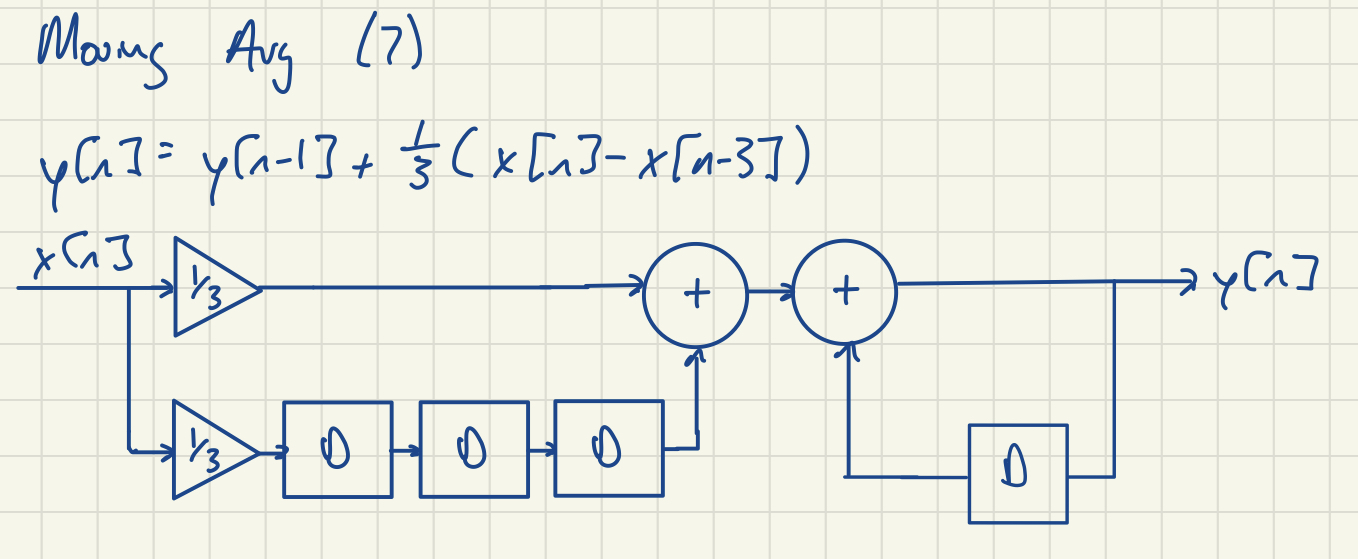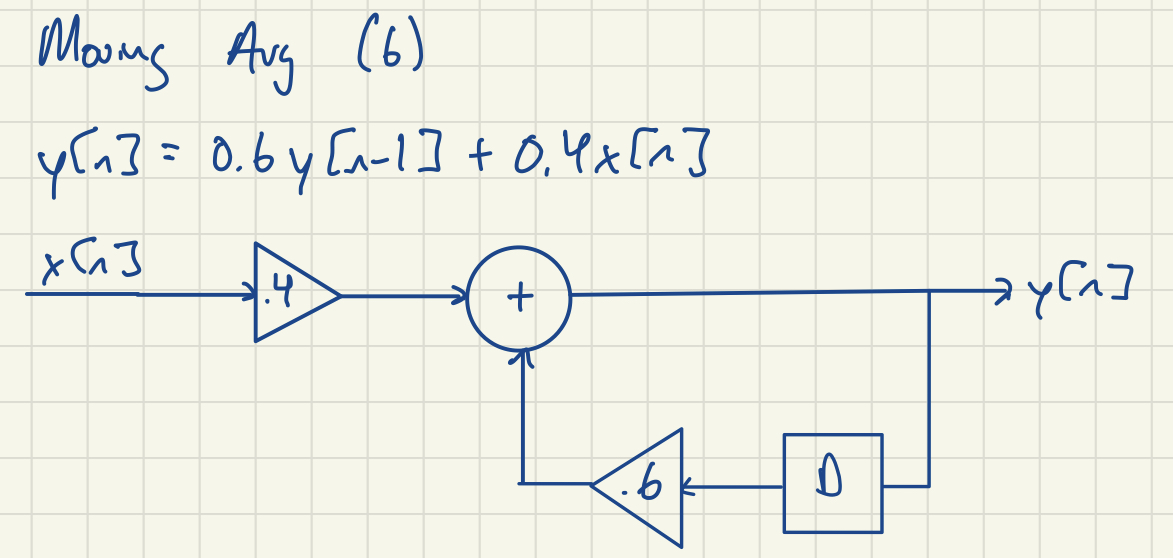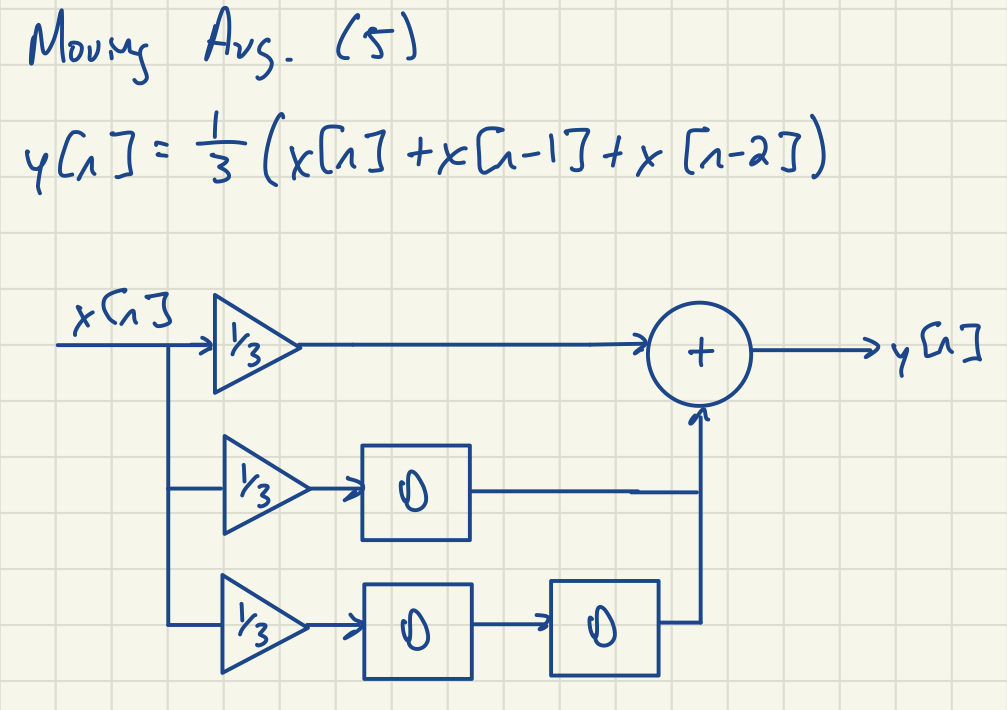

**3. Calculate the impulse response**

(5) 

h[n] = 1/3 * (δ[n]+ δ[n-1] + δ[n-2])

(6) assuming y[n] = 0, n < 0 (n is an int)

h[n] = 0, n < 0

h[n] = .4*(3/5)^n, n >= 0

(7) assuming y[n] = 0, n < 0 (n is an int)

h[n] = 0, n < 0

h[n] = 1/3, 0 <= n < 3

h[n] = 2/3 , 3 <= n 

**4. Explain why methods (5) and (7) are known as moving average.**

(5) takes the current average by adding the values of today, yesterday, and 2 days ago and dividing by the count of days, 3. It is a moving average because as we move in time, it will keep updating the average value of the new today through its difference equation.

(7) is still taking an average by adding the average value of yesterday to the sum of the value of today and 3 days ago divided by the count of days, 3. The average value of yesterday does not need to be divided because it already is an average. However, we still need to divide the non-averaged numbers by the count of days. It is a moving average because as we move in time, it will keep updating the average value of the new today through the given difference equation.

<h3 style="color:red;"><left>Exercise 6.2</left></h3>

Load the file ```stockrates.npy``` into Python. This file contains a vector of daily stock market exchange rates for a publicly-traded stock.

Apply filters (6) and (7) to smooth the stock values. When you apply filter (6), you will need to initialize the value of *averagevalue(yesterday)*. Use an initial value of $0$. Similarly, in filter (7), set the initial values of the *value* vector to $0$ (for the days prior to the start of data collection).

**Note: You will need the following code to load data that is stored in a `.npy` file.**

In [75]:
rate = np.load("stockrates.npy")

**1. Plot the original stock values.**

<ipython-input-76-01b4f877abf5>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(rate)


<StemContainer object of 3 artists>

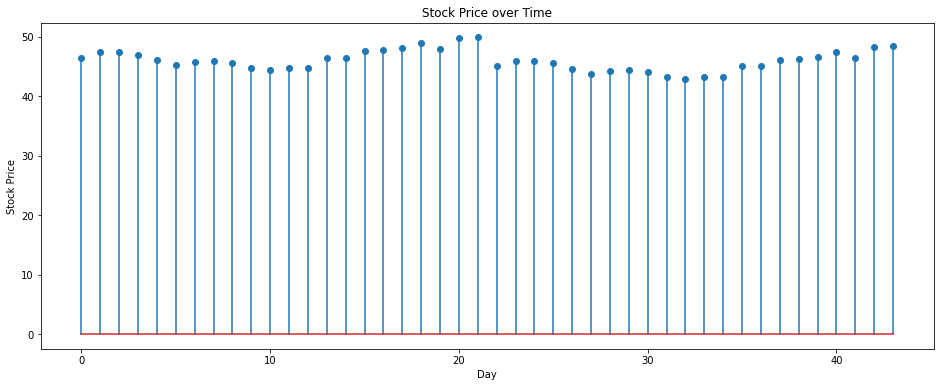

In [76]:
# write your code here
plt.title("Stock Price over Time")
plt.ylabel("Stock Price")
plt.xlabel("Day")
plt.stem(rate)

**2. Plot the result of filtering with (6).**

<ipython-input-77-b3d71e9a791f>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(yn)


<StemContainer object of 3 artists>

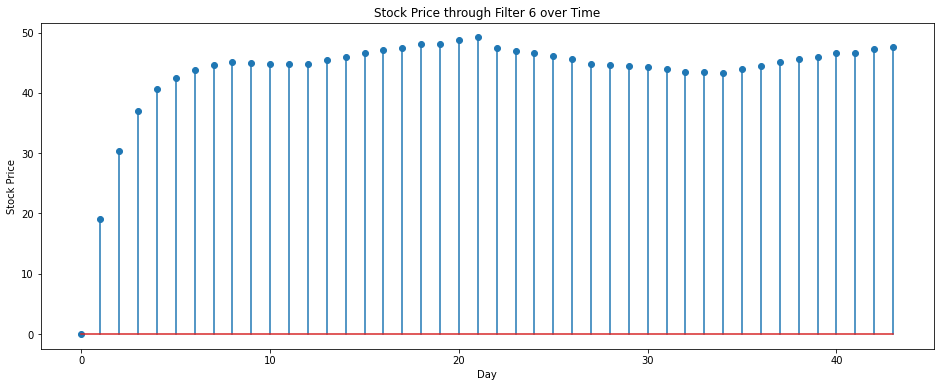

In [77]:
# write your code here
xn = rate 
yn = np.zeros(len(xn))
yn[0] = 0

for i in range(1, len(xn)):
  yn[i] = (.6) * yn[i - 1] + (.4) * xn[i]

plt.title("Stock Price through Filter 6 over Time")
plt.ylabel("Stock Price")
plt.xlabel("Day")
plt.stem(yn)


**3. Plot the result of filtering with (7).**

<ipython-input-78-2d46e78e8b54>:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(yn)


<StemContainer object of 3 artists>

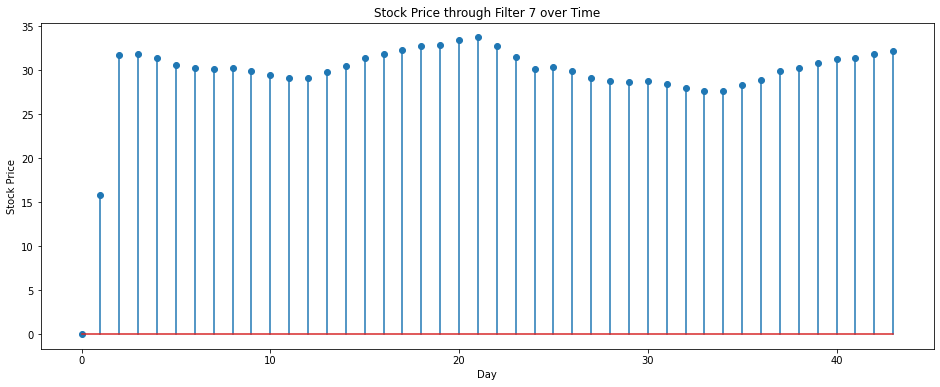

In [78]:
# write your code here
xn_0 = rate 
xn_3 = np.zeros(len(xn_0) + 3)
for i in range(3, len(xn_3)):
  xn_3[i] = xn_0[i-3]

yn = np.zeros(len(xn_0))
yn[0] = 0

for i in range(1, len(xn)):
    yn[i] = yn[i - 1] + (1/3) * (xn_0[i] - xn_3[i])

plt.title("Stock Price through Filter 7 over Time")
plt.ylabel("Stock Price")
plt.xlabel("Day")
plt.stem(yn)

**4. Discuss the advantages and disadvantages of the two filters (6) and (7). Can you suggest a better method for initializing the filter outputs?**.

First off, it is important to note that filter (6) is a weighted average and filter (7) is a moving average. Both graphs tell a slighly different story of the same data.

Filter (6) puts more emphasize of the average value of yesterday compared to the current value of today. This could be good if you want the graph to not be heavily fluctuated based off today's value, helping smooth outlier data. This could also be bad as it could over/under play today's performance. Also, the filter is not accurate for several data points at the start of the graph because of the initial condition given.

Filter (7) uses the average value of yesterday summed with the average of the value of today and 3 days ago to create a moving average. This could be good if you want a value that takes in account for current and past data, reducing graph flucatation based soley off today's value. Similar to above, the filter is not accurate for couple data points at the start of the graph because of the initial condition given.

The inital condition is the main issue with the filters. A better method for initialzing the filter outputs would be making the initial condition the value of the stock price on the first day instead of 0.